<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
import scipy as sci

# Import in-built functions for different integration techniques
# For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad

from scipy.optimize import newton
from scipy.special import roots_legendre 
from scipy.special import erf

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [2]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        '''The class Quad tkaes four inputs: 
         fuc: a function input,
         N: number of grid points,
         a,b: left and right points'''
        self.a = a
        self.b = b
        self.N = N
    
    def mid_quad(self, fuc):

        dx          = (self.b - self.a)/float(self.N)
        left_edges  = np.linspace(self.a, self.b, self.N)
        x_midpoints = left_edges + (dx/2.0)
        f_midpoints = fuc(x_midpoints)
        dA_array    = f_midpoints * dx
        approx_I    = np.sum(dA_array)

        # print(f"a, b, N, dx: {self.a}, {self.b}, {self.N}, {dx}")
        # print("left_edges:")
        # display(left_edges)
        # print("x_midpoints:")
        # display(x_midpoints)
        # print("f_midpoints:")
        # display(f_midpoints)
        # print("dA_array:")
        # display(dA_array)
        # print(f"approx_I: {approx_I}")
        # print()
        return approx_I
    
    def trapz_quad(self, fuc):

        dx          = (self.b - self.a)/float(self.N)
        left_edges  = np.linspace(self.a, self.b, self.N)
        right_edges = left_edges + dx
        left_func   = fuc(left_edges)
        right_func  = fuc(right_edges)

        # Now find the average of left & right:
        # Use np.sum([array1,array2]) to add element-wise
        f_averages  = np.sum([left_func, right_func]) / 2.0
        dA_array    = f_averages * dx
        approx_I    = np.sum(dA_array)
        return approx_I
    
    def simpson_quad(self, fuc):
        
        dx          = (self.b - self.a)/float(self.N)
        left_edges  = np.linspace(self.a, self.b, self.N)
        x_midpoints = left_edges + (dx/2.0)
        right_edges = left_edges + dx
        left_func   = fuc(left_edges)
        f_midpoints = fuc(x_midpoints)
        right_func  = fuc(right_edges)
        coeffs      = (right_edges - left_edges)/3.0
        dA_array    = coeffs * (left_func + 4.0*f_midpoints + right_func)
        approx_I    = np.sum(dA_array)

        # print(f"a, b, N, dx: {self.a}, {self.b}, {self.N}, {dx}")
        # print("left_edges:")
        # display(left_edges)
        # print("x_midpoints:")
        # display(x_midpoints)
        # print("f_midpoints:")
        # display(f_midpoints)
        # print("dA_array:")
        # display(dA_array)
        # print(f"approx_I: {approx_I}")
        # print()
        return approx_I

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

# Add the following to the class in part A). 
def mid_quad(self,...):
    pass
def trapz_quad(self,...):
    pass
def simpson_quad(self,...):
    pass



<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

In [3]:
class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
        super().__init__(fuc, N, a, b)
        self.order = order

    # Legendre polynomials P_0 - P_5, selected by self.order
    # These can be found here:
    # https://mathworld.wolfram.com/LegendrePolynomial.html  (Eq 2 - Eq 7)
    
    def legendre_poly(self, x):
        if self.order == 0:
            return 1
        elif self.order == 1:
            return x
        elif self.order == 2:
            return (3 * (x**2) - 1)/2.0
        elif self.order == 3:
            return (5 * (x**3) - 3 * x)/2.0
        elif self.order == 4:
            return (35 * (x**4) - 30 * (x**2) + 3)/8.0
        elif self.order == 5:
            return (63 * (x**5) - 70 * (x**3) + 15 * x)/8.0
  
        return 0

    
    # First derivatives of Legendre polynomials P_0 - P_5, selected by self.order
    
    def legendre_poly_prime(self, x):
        if self.order == 0:
            # P_0(x) = 1
            # P_0'(x) = 0
            return np.zeros(len(x))
        elif self.order == 1:
            # P_1(x) = x
            # P_1'(x) = 1
            return np.ones(len(x))
        elif self.order == 2:
            # P_2(x) = (3 * (x**2) - 1)/2.0
            # P_2'(x) = (1/2.0)*(3 * (2*x)) = 3*x
            return 3*x
        elif self.order == 3:
            # P_3(x) = (5 * (x**3) - 3 * x)/2.0
            # P_3'(x) = (1/2.0)*(5 * (3*x**2) - 3)
            return (15 * (x**2) - 3)/2.0
        elif self.order == 4:
            # P_4(x) = (35 * (x**4) - 30 * (x**2) + 3)/8.0
            # P_4'(x) = (1/8.0)*(35 * (4*x**3) - 30 * (2*x))
            return (140 * (x**3) - 60 * x)/8.0
        elif self.order == 5:
            # P_5(x) = (63 * (x**5) - 70 * (x**3) + 15 * x)/8.0
            # P_5'(x) = (1/8.0)*(63 * (5*x**4) - 70 * (3*x**2) + 15)
            return (315 * (x**4) - 210 * (x**2) + 15)/8.0
  
        return 0

    def newton_method_root(self):
        estimates = np.array([None]*(len(M_vals)+1))
        # Prepare estmates by eye using the graphs plotted
        e1 = [0.0]
        e2 = [-0.55, 0.55]
        e3 = [-0.77, 0.0, 0.77]
        e4 = [-0.89, -0.30, 0.29, 0.85]
        e5 = [-0.90, -0.55, 0.0, 0.55, 0.90]
        estimates[0] = None
        estimates[1] = e1
        estimates[2] = e2
        estimates[3] = e3
        estimates[4] = e4
        estimates[5] = e5

        # Declare arrays
        roots   = np.array([0.0]*self.order)
        weights = np.array([0.0]*self.order)
        f       = self.legendre_poly

        r = 0
        for est in estimates[self.order]:
            
            # First, find the root that lies in the interval [est, est+0.25]
            my_root = newton(f, est, x1=est+0.25)
            roots[r] = my_root  # Add to list            
            r += 1

        # Now find the "weights" of these roots.
        
        # We will use the expression given below for w_i(x)
        
        #     w_i = 2.0 / ((1.0 - x_i^2) * (P_M'(x_i))^2)
        
        
        # First, find the first derivative
        derivs  = self.legendre_poly_prime(roots)

        for i in range(self.order):
            weights[i] = 2.0 / ((1.0 - roots[i]**2) * (derivs[i]**2))

        return roots, weights

    def scipy_method_root(self):
        return roots_legendre(self.order)

    
    # Note: to support this new method, we added self.a, self.b, etc. to the Quad_ class above.
    # See the parent class's __init()__ function
    
    def gauss_quad(self, func):

        coeff = (self.b - self.a) / 2.0

        # Go get the roots and weights for this P_M:
        roots, weights = self.newton_method_root()

        # Evaluate our function at those roots, but respect the change of variables
        # as described above
        u = coeff * roots + (self.b + self.a) / 2.0
        
        # func had better be vectorized so we can just give it the np.array of roots...
        f_vals = func(u)

        # Compute the product of w_i and func(x_i)
        prod   = weights * f_vals

        # Compute the sum
        sum = np.sum(prod)

        # And the final answer:
        q_val = coeff * sum

        return q_val

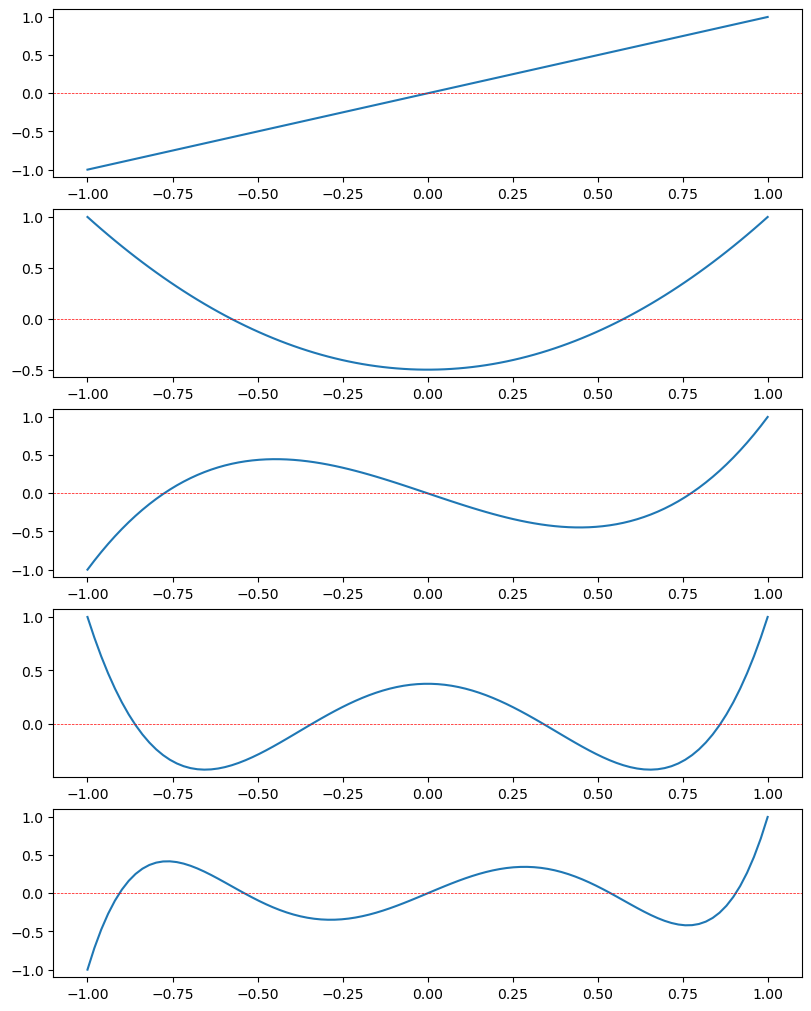

In [4]:
# Plot the P_M(x) Legendre polys for M=[1,2,3,4,5]
M_vals = [1, 2, 3, 4, 5]

# Set up an array of x values
x_vals = np.linspace(-1, 1, 100)

fig, axs = plt.subplots(len(M_vals), 1, figsize=(8, 10), layout='constrained')

for row in range(len(M_vals)):
    Q_Gauss = Gauss_Quad_(None, 100, -1, 1, M_vals[row])

    y_vals = Q_Gauss.legendre_poly(x_vals)
    axs[row].plot(x_vals, y_vals)
    axs[row].axhline(y=0.0, color='r', linestyle='dashed', linewidth=0.5)
    row += 1
plt.show()

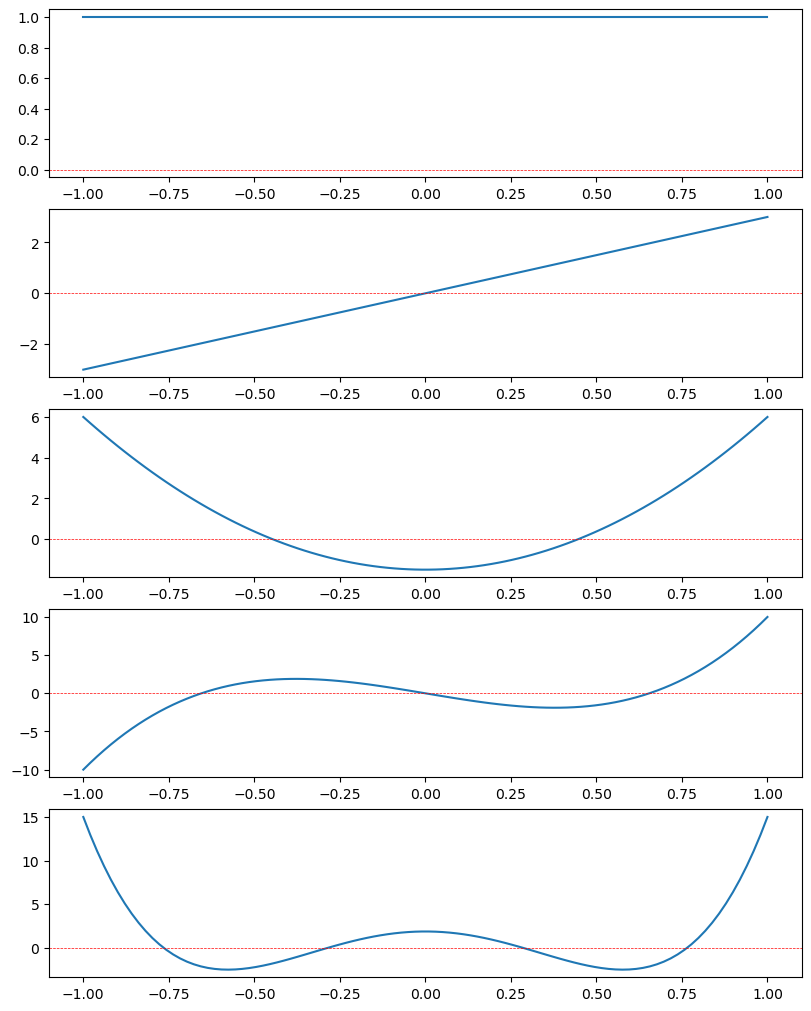

In [5]:
# Out of curiosity, let's plot the first derivatives, too.

# Plot the P_M'(x) of Legendre polys for M=[1,2,3,4,5]
M_vals = [1, 2, 3, 4, 5]

# Set up an array of x values
x_vals = np.linspace(-1, 1, 100)

fig, axs = plt.subplots(len(M_vals), 1, figsize=(8, 10), layout='constrained')

for row in range(len(M_vals)):
    Q_Gauss = Gauss_Quad_(None, 100, -1, 1, M_vals[row])

    y_vals = Q_Gauss.legendre_poly_prime(x_vals)
    axs[row].plot(x_vals, y_vals)
    axs[row].axhline(y=0.0, color='r', linestyle='dashed', linewidth=0.5)
    row += 1
plt.show()

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [6]:
# Add the following to the class in part D). 
# def newton_method_root(self,...):
#    return root,weights

# Open a file
out_file = open(r"newton.txt","w+")

print("Newtonian results:")
for row in range(len(M_vals)):
    Q_Gauss        = Gauss_Quad_(None, 100, -1, 1, M_vals[row])

    roots, weights = Q_Gauss.newton_method_root()

    print(f"Order {M_vals[row]}:")
    print(f"\tRoots:   {roots}")
    print(f"\tWeights: {weights}")

    # Write the same info to our file (need to include the \n here)
    out_file.write(f"Order {M_vals[row]}:\n")
    out_file.write(f"\tRoots:   {roots}\n")
    out_file.write(f"\tWeights: {weights}\n")

# Be sure to close the file.
out_file.close()

Newtonian results:
Order 1:
	Roots:   [0.]
	Weights: [2.]
Order 2:
	Roots:   [-0.57735027  0.57735027]
	Weights: [1. 1.]
Order 3:
	Roots:   [-0.77459667  0.          0.77459667]
	Weights: [0.55555556 0.88888889 0.55555556]
Order 4:
	Roots:   [-0.86113631 -0.33998104  0.33998104  0.86113631]
	Weights: [0.34785485 0.65214515 0.65214515 0.34785485]
Order 5:
	Roots:   [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
	Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [7]:
# Add the following to the class in part D). 
# from scipy.special import roots_legendre 
# def scipy_method_root(self,...):
#    return root,weights
print("Scipy built-in results:")
for row in range(len(M_vals)):
    Q_Gauss        = Gauss_Quad_(None, 100, -1, 1, M_vals[row])

    roots, weights = Q_Gauss.scipy_method_root()

    print(f"Order {M_vals[row]}:")
    print(f"\tRoots:   {roots}")
    print(f"\tWeights: {weights}")

print(f"They agree!")

Scipy built-in results:
Order 1:
	Roots:   [0.]
	Weights: [2.]
Order 2:
	Roots:   [-0.57735027  0.57735027]
	Weights: [1. 1.]
Order 3:
	Roots:   [-0.77459667  0.          0.77459667]
	Weights: [0.55555556 0.88888889 0.55555556]
Order 4:
	Roots:   [-0.86113631 -0.33998104  0.33998104  0.86113631]
	Weights: [0.34785485 0.65214515 0.65214515 0.34785485]
Order 5:
	Roots:   [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
	Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
They agree!


## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

# Add the following to the class in part D).
def gauss_quad(self,...):
    pass 


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





In [8]:
# Try a little test of a lambda function
def fprint(func):
    for x in range(5):
        print(f"\tx: {x} f(x): {func(x)}")

for k in range(4):
    print(f"k: {k}")
    fprint(lambda x: x**k)


k: 0
	x: 0 f(x): 1
	x: 1 f(x): 1
	x: 2 f(x): 1
	x: 3 f(x): 1
	x: 4 f(x): 1
k: 1
	x: 0 f(x): 0
	x: 1 f(x): 1
	x: 2 f(x): 2
	x: 3 f(x): 3
	x: 4 f(x): 4
k: 2
	x: 0 f(x): 0
	x: 1 f(x): 1
	x: 2 f(x): 4
	x: 3 f(x): 9
	x: 4 f(x): 16
k: 3
	x: 0 f(x): 0
	x: 1 f(x): 1
	x: 2 f(x): 8
	x: 3 f(x): 27
	x: 4 f(x): 64


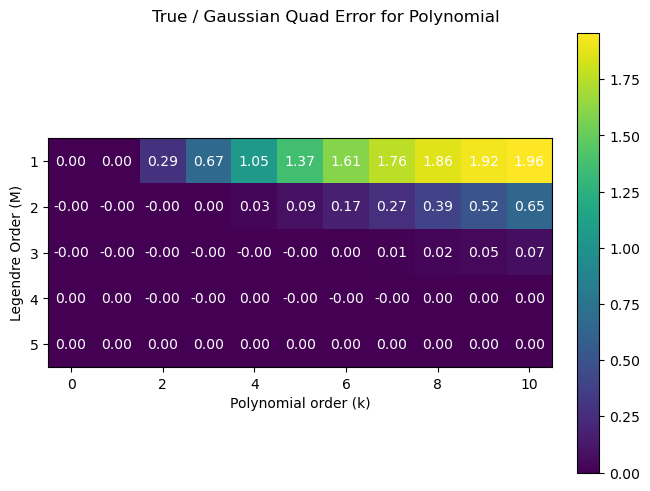

'--------------------Write your code above this line------------------------------'

In [9]:


'''--------------------Write your code below this line------------------------------'''
def Poly_I_True_TA(a, b, k):
    return ((1.0/(k+1))*(b**(k+1) - a**(k+1)))

def Simple_Poly(x, k):
    return x**k

a              = 0
b              = 1
N_vals         = 10**np.array(M_vals)                         # Will be x-axis
k_vals         = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Will be y-axis

true_poly_integrals = np.zeros((len(M_vals), len(k_vals)))

gauss_quad_vals     = np.zeros((len(M_vals), len(k_vals)))
gauss_quad_errs     = np.zeros((len(M_vals), len(k_vals)))


# Calculate the true values:
# Note: this analytical computation does NOT depend on N, so all rows will be the same.

for i in range(len(M_vals)):
    for j in range(len(k_vals)):
        true_poly_integrals[i][j] = Poly_I_True_TA(a, b, k_vals[j])

# Calculate the Gauss Quadrature values:

for i in range(len(M_vals)):
    myG_Q = Gauss_Quad_(None, 100, a, b, M_vals[i])
    for j in range(len(k_vals)):
#        gauss_quad_vals[i][j] = myG_Q.gauss_quad(lambda x: x**k_vals[j])
        gauss_quad_vals[i][j] = myG_Q.gauss_quad(lambda x: Simple_Poly(x, k_vals[j]))

for i in range(len(M_vals)):
    for j in range(len(k_vals)):
        numerator   = true_poly_integrals[i][j] - gauss_quad_vals[i][j]
        denominator = true_poly_integrals[i][j] + gauss_quad_vals[i][j]
        if denominator == 0:
            denominator = 1.0
        gauss_quad_errs[i][j] = 2.0 * (numerator/denominator)

fig, hm_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("True / Gaussian Quad Error for Polynomial")
er_im = hm_axs.imshow(gauss_quad_errs, aspect='equal')
hm_axs.set_yticks(np.arange(len(M_vals)), labels=M_vals)
hm_axs.set_ylabel("Legendre Order (M)")
hm_axs.set_xlabel("Polynomial order (k)")
for i in range(len(M_vals)):
    for j in range(len(k_vals)):
        text = hm_axs.text(j, i, f"{gauss_quad_errs[i][j]:0.02f}",
                       ha="center", va="center", color="w")
plt.colorbar(er_im)
plt.show()


'''--------------------Write your code above this line------------------------------'''

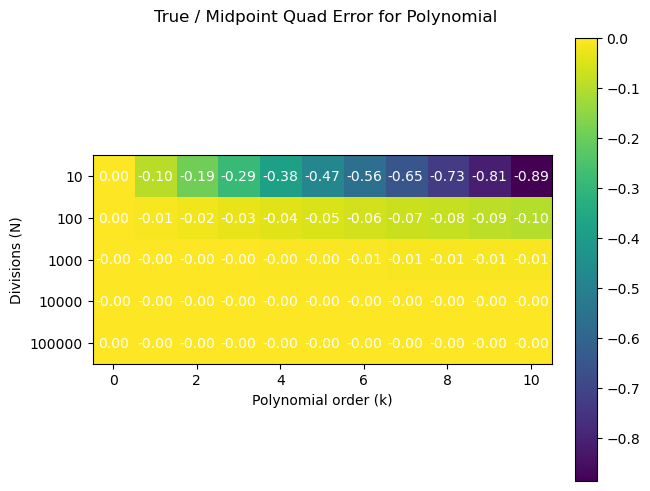

In [10]:
mid_quad_vals     = np.zeros((len(N_vals), len(k_vals)))
mid_quad_errs     = np.zeros((len(N_vals), len(k_vals)))


# Calculate the Midpoint Quadrature values:

for i in range(len(N_vals)):
    for j in range(len(k_vals)):
        myQ = Quad_(None, N_vals[i], a, b)
        mid_quad_vals[i][j] = myQ.mid_quad(lambda x: Simple_Poly(x, k_vals[j]))

for i in range(len(N_vals)):
    for j in range(len(k_vals)):
        numerator   = true_poly_integrals[i][j] - mid_quad_vals[i][j]
        denominator = true_poly_integrals[i][j] + mid_quad_vals[i][j]
        if denominator == 0:
            denominator = 1.0
        mid_quad_errs[i][j] = 2.0 * (numerator/denominator)

fig, hm_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("True / Midpoint Quad Error for Polynomial")
er_im = hm_axs.imshow(mid_quad_errs, aspect='equal')
hm_axs.set_yticks(np.arange(len(N_vals)), labels=N_vals)
hm_axs.set_ylabel("Divisions (N)")
hm_axs.set_xlabel("Polynomial order (k)")
for i in range(len(M_vals)):
    for j in range(len(k_vals)):
        text = hm_axs.text(j, i, f"{mid_quad_errs[i][j]:0.02f}",
                           ha="center", va="center", color="w")
plt.colorbar(er_im)
plt.show()


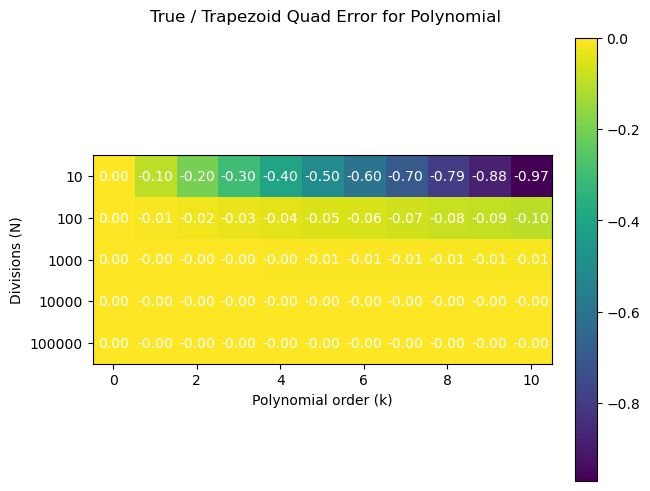

In [11]:
trap_quad_vals     = np.zeros((len(N_vals), len(k_vals)))
trap_quad_errs     = np.zeros((len(N_vals), len(k_vals)))


# Calculate the Trapezoidal Quadrature values:

for i in range(len(N_vals)):
    for j in range(len(k_vals)):
        myQ = Quad_(None, N_vals[i], a, b)
        trap_quad_vals[i][j] = myQ.trapz_quad(lambda x: Simple_Poly(x, k_vals[j]))

for i in range(len(N_vals)):
    for j in range(len(k_vals)):
        numerator   = true_poly_integrals[i][j] - trap_quad_vals[i][j]
        denominator = true_poly_integrals[i][j] + trap_quad_vals[i][j]
        if denominator == 0:
            denominator = 1.0
        trap_quad_errs[i][j] = 2.0 * (numerator/denominator)

fig, hm_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("True / Trapezoid Quad Error for Polynomial")
er_im = hm_axs.imshow(trap_quad_errs, aspect='equal')
hm_axs.set_yticks(np.arange(len(N_vals)), labels=N_vals)
hm_axs.set_ylabel("Divisions (N)")
hm_axs.set_xlabel("Polynomial order (k)")
for i in range(len(M_vals)):
    for j in range(len(k_vals)):
        text = hm_axs.text(j, i, f"{trap_quad_errs[i][j]:0.02f}",
                           ha="center", va="center", color="w")
plt.colorbar(er_im)
plt.show()

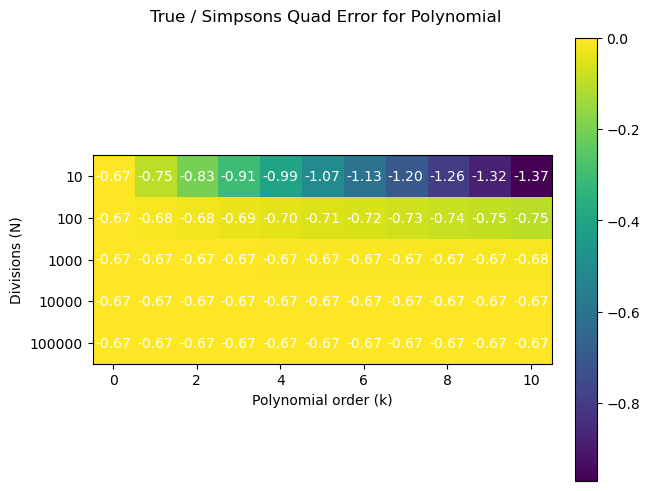

In [12]:
simp_quad_vals     = np.zeros((len(N_vals), len(k_vals)))
simp_quad_errs     = np.zeros((len(N_vals), len(k_vals)))


# Calculate the Midpoint Quadrature values:

for i in range(len(N_vals)):
    for j in range(len(k_vals)):
        myQ = Quad_(None, N_vals[i], a, b)
        simp_quad_vals[i][j] = myQ.simpson_quad(lambda x: Simple_Poly(x, k_vals[j]))

for i in range(len(N_vals)):
    for j in range(len(k_vals)):
        numerator   = true_poly_integrals[i][j] - simp_quad_vals[i][j]
        denominator = true_poly_integrals[i][j] + simp_quad_vals[i][j]
        if denominator == 0:
            denominator = 1.0
        simp_quad_errs[i][j] = 2.0 * (numerator/denominator)

fig, hm_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("True / Simpsons Quad Error for Polynomial")
er_im = hm_axs.imshow(trap_quad_errs, aspect='equal')
hm_axs.set_yticks(np.arange(len(N_vals)), labels=N_vals)
hm_axs.set_ylabel("Divisions (N)")
hm_axs.set_xlabel("Polynomial order (k)")
for i in range(len(M_vals)):
    for j in range(len(k_vals)):
        text = hm_axs.text(j, i, f"{simp_quad_errs[i][j]:0.02f}",
                           ha="center", va="center", color="w")
plt.colorbar(er_im)
plt.show()

## H) Fermi–Dirac


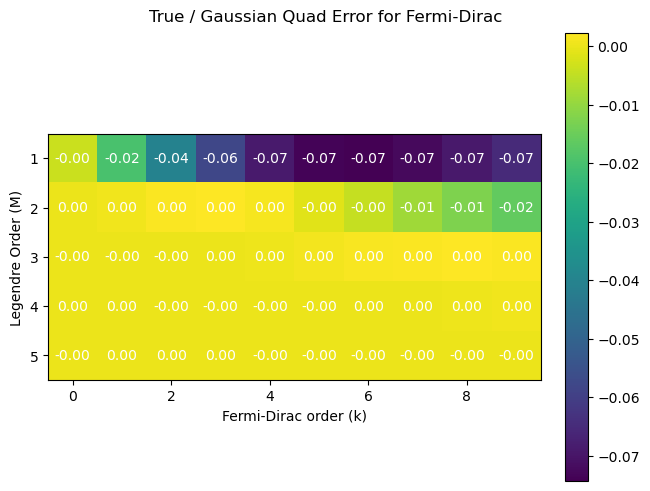

'--------------------Write your code above this line------------------------------'

In [13]:


'''--------------------Write your code below this line------------------------------'''
def FermiDirac_I_True_TB(a, b, k):
    exp_a  = np.exp(k*a)
    exp_b  = np.exp(k*b)
    term_a = np.log(exp_a + 1)
    term_b = np.log(exp_b + 1)
    
    return (1.0/k)*(term_b - term_a)

def Simple_FermiDirac(x, k):
    denominator = (1.0 + np.exp(-1.0 * k * x))
    return 1.0 / denominator

K_vals         = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Will be y-axis

true_fermi_integrals  = np.zeros((len(M_vals), len(K_vals)))

gauss_quad_vals_fermi = np.zeros((len(M_vals), len(K_vals)))
gauss_quad_errs_fermi = np.zeros((len(M_vals), len(K_vals)))

# Calculate the true values:

for i in range(len(M_vals)):
    for j in range(len(K_vals)):
        true_fermi_integrals[i][j] = FermiDirac_I_True_TB(a, b, K_vals[j])

# Calculate the Gauss Quadrature values:

for i in range(len(M_vals)):
    myG_Q = Gauss_Quad_(None, 100, a, b, M_vals[i])
    for j in range(len(K_vals)):
        gauss_quad_vals_fermi[i][j] = myG_Q.gauss_quad(lambda x: Simple_FermiDirac(x, K_vals[j]))

for i in range(len(M_vals)):
    for j in range(len(K_vals)):
        numerator   = true_fermi_integrals[i][j] - gauss_quad_vals_fermi[i][j]
        denominator = true_fermi_integrals[i][j] + gauss_quad_vals_fermi[i][j]
        if denominator == 0:
            denominator = 1.0
        gauss_quad_errs_fermi[i][j] = 2.0 * (numerator/denominator)

fig, hm_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("True / Gaussian Quad Error for Fermi-Dirac")
er_im = hm_axs.imshow(gauss_quad_errs_fermi, aspect='equal')
hm_axs.set_yticks(np.arange(len(M_vals)), labels=M_vals)
hm_axs.set_ylabel("Legendre Order (M)")
hm_axs.set_xlabel("Fermi-Dirac order (k)")
for i in range(len(M_vals)):
    for j in range(len(K_vals)):
        text = hm_axs.text(j, i, f"{gauss_quad_errs_fermi[i][j]:0.02f}",
                       ha="center", va="center", color="w")
plt.colorbar(er_im)
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [14]:
def V(x):
    # 'Potential'
    V = x**4
    return V

def timep(x):
    # 'Define the function that needs to be integrated (integrand) to calculate time period'
    m = 1 # change this if we need a different 'm' value
    a = 2
    constants = np.sqrt(8*m)
    denom = np.sqrt(V(a) - V(x))
    T = constants*(1/denom)
    return T


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

<p>Please note: for scipy.integrate.fixed_quad to function, I had to remove a from the function definition of timep(x,a) and have it be ONLY a function of x, hard-coding in the a=2.</p>

In [15]:
'''--------------------Write your code below this line------------------------------'''
import scipy as sci

N1 = 5
N2 = 10
N3 = 100
N4 = 200
N5 = 400
N6 = 800
N7 = 1600
N8 = N7*2.0
N9 = N8*2.0

T1 = sci.integrate.fixed_quad(timep, 0, 2, n=N1)
T2 = sci.integrate.fixed_quad(timep, 0, 2, n=N2)
T3 = sci.integrate.fixed_quad(timep, 0, 2, n=N3)
T4 = sci.integrate.fixed_quad(timep, 0, 2, n=N4)
T5 = sci.integrate.fixed_quad(timep, 0, 2, n=N5)
T6 = sci.integrate.fixed_quad(timep, 0, 2, n=N6)
T7 = sci.integrate.fixed_quad(timep, 0, 2, n=N7)
T8 = sci.integrate.fixed_quad(timep, 0, 2, n=N8)
T9 = sci.integrate.fixed_quad(timep, 0, 2, n=N9)

if True:
    print(T1)
    print(T2)
    print(T3)
    print(T4)
    print(T5)
    print(T6)
    print(T7)
    print(T8)
    print(T9)

aaa = T2[0] - T1[0]
diffT1_T2 = np.abs(aaa)

bbb = T4[0] - T3[0]
diffT3_T4 = np.abs(bbb)

ccc = T5[0] - T4[0]
diffT4_T5 = np.abs(ccc)

ddd = T6[0] - T5[0]
diffT5_T6 = np.abs(ddd)

eee = T7[0] - T6[0]
diffT6_T7 = np.abs(eee)

fff = T8[0] - T7[0]
diffT7_T8 = np.abs(fff)

ggg = T9[0] - T8[0]
diffT8_T9 = np.abs(ggg)

print(f'The absolute difference between N=5 and N=10 is {diffT1_T2}, while the absolute difference between N=100 and N=200 is {diffT3_T4}.')

print(f'N=200 N=400: {diffT4_T5}; N=400 N=800: {diffT5_T6}; N=800 N=1600: {diffT6_T7}')

print(f'N=1600 N=3200: {diffT7_T8}')

print(f'N=3200 2N: {diffT8_T9}')

print()

print(f'As visible in the last line, at approximately N=3200, the absolute difference between N and 2N is smaller than 1E-4 at {diffT8_T9}.')

'''--------------------Write your code above this line------------------------------'''

(1.7423988227627663, None)
(1.7954772678567572, None)
(1.8479486419263522, None)
(1.8510040049510015, None)
(1.8525374223083766, None)
(1.8533055694520117, None)
(1.8536900030592116, None)
(1.8538823103745647, None)
(1.8539784866459617, None)
The absolute difference between N=5 and N=10 is 0.053078445093990956, while the absolute difference between N=100 and N=200 is 0.0030553630246492602.
N=200 N=400: 0.0015334173573751109; N=400 N=800: 0.0007681471436351561; N=800 N=1600: 0.0003844336071998633
N=1600 N=3200: 0.00019230731535313517
N=3200 2N: 9.617627139690832e-05

As visible in the last line, at approximately N=3200, the absolute difference between N and 2N is smaller than 1E-4 at 9.617627139690832e-05.


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [16]:
'''--------------------Write your code below this line------------------------------'''
quadres = sci.integrate.quad(timep, 0, 2)
display(quadres)

quadT = quadres[0]
quaderr = quadres[1]

percdiff=((quaderr - diffT8_T9))/((quaderr + diffT8_T9)/2)*100

print(f'The quad result gave a time period of {quadres[0]} and an error of {quadres[1]}, which was {percdiff}% different than given for fixed_quad with N=3200 steps placing the absolute error under 1E-4.')
'''--------------------Write your code above this line------------------------------'''

(1.8540746773017016, 2.006794730391448e-10)

The quad result gave a time period of 1.8540746773017016 and an error of 2.006794730391448e-10, which was -199.99916536978867% different than given for fixed_quad with N=3200 steps placing the absolute error under 1E-4.


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [17]:
'''--------------------Write your code below this line------------------------------'''
a = 2
rombergres = sci.integrate.romberg(timep, 0, a)
display(rombergres)

rombergres_adjusted = sci.integrate.romberg(timep, 0, (a-(1e-4)))
display(rombergres_adjusted)
'''--------------------Write your code above this line------------------------------'''

C:\Users\Emi\AppData\Local\Temp\ipykernel_33316\3978977302.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  T = constants*(1/denom)
C:\Users\Emi\anaconda3\Lib\site-packages\scipy\integrate\_quadrature.py:942: RuntimeWarning: invalid value encountered in scalar subtract
  return (tmp * c - b)/(tmp - 1.0)
C:\Users\Emi\anaconda3\Lib\site-packages\scipy\integrate\_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  warnings.warn(


nan

C:\Users\Emi\anaconda3\Lib\site-packages\scipy\integrate\_quadrature.py:1074: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.910055e-02
  warnings.warn(


1.8553789981560493

'--------------------Write your code above this line------------------------------'

<p>Yes, I did receive a "nan" result initially! This is because it's encountering a divide by zero in the denominator of my original timep function, meaning its $\sqrt{V(a) - V(x)} = 0$. It's running super close to the top limit of a=2, where the difference will be 0.</p>

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [18]:
'''--------------------Write your code below this line------------------------------'''
from scipy.special import erf

rombergres_unc = sci.integrate.romberg(timep, 0, (a-(1e-4)), show=True, divmax=10, rtol=(1e-5))
display(rombergres_unc)

'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001932AA118A0> from [0, 1.9999]

 Steps  StepSize   Results
     1  1.999900 50.706446 
     2  0.999950 26.083479 17.875823 
     4  0.499975 13.823544  9.736899  9.194305 
     8  0.249988  7.733873  5.703983  5.435122  5.375453 
    16  0.124994  4.718967  3.713999  3.581333  3.551908  3.544757 
    32  0.062497  3.233141  2.737865  2.672790  2.658368  2.654864  2.653994 
    64  0.031248  2.505653  2.263157  2.231510  2.224505  2.222804  2.222381  2.222276 
   128  0.015624  2.152826  2.035217  2.020021  2.016664  2.015849  2.015646  2.015596  2.015583 
   256  0.007812  1.984084  1.927836  1.920678  1.919101  1.918718  1.918623  1.918600  1.918594  1.918592 
   512  0.003906  1.905050  1.878705  1.875429  1.874711  1.874537  1.874494  1.874483  1.874480  1.874480  1.874480 
  1024  0.001953  1.869180  1.857223  1.855791  1.855479  1.855404  1.855385  1.855381  1.855379  1.855379  1.855379  1.855379 

The final resu

1.8553789981560493

'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [19]:
'''--------------------Write your code below this line------------------------------'''
rombergres_15 = sci.integrate.romberg(timep, 0, (a-(1e-4)), show=True, divmax=15, rtol=(1e-5))
display(rombergres_15)
'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001932AA10040> from [0, 1.9999]

 Steps  StepSize   Results
     1  1.999900 50.706446 
     2  0.999950 26.083479 17.875823 
     4  0.499975 13.823544  9.736899  9.194305 
     8  0.249988  7.733873  5.703983  5.435122  5.375453 
    16  0.124994  4.718967  3.713999  3.581333  3.551908  3.544757 
    32  0.062497  3.233141  2.737865  2.672790  2.658368  2.654864  2.653994 
    64  0.031248  2.505653  2.263157  2.231510  2.224505  2.222804  2.222381  2.222276 
   128  0.015624  2.152826  2.035217  2.020021  2.016664  2.015849  2.015646  2.015596  2.015583 
   256  0.007812  1.984084  1.927836  1.920678  1.919101  1.918718  1.918623  1.918600  1.918594  1.918592 
   512  0.003906  1.905050  1.878705  1.875429  1.874711  1.874537  1.874494  1.874483  1.874480  1.874480  1.874480 
  1024  0.001953  1.869180  1.857223  1.855791  1.855479  1.855404  1.855385  1.855381  1.855379  1.855379  1.855379  1.855379 
  2048  0.00097

C:\Users\Emi\anaconda3\Lib\site-packages\scipy\integrate\_quadrature.py:1074: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.201258e-05
  warnings.warn(


1.8440762458273863

'--------------------Write your code above this line------------------------------'

<p>It appears that the accuracy limit is exceeded for 15, but not for 10.</p>

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

C:\Users\Emi\AppData\Local\Temp\ipykernel_33316\4119241700.py:7: RuntimeWarning: divide by zero encountered in divide
  T = constants*(1/denom)


'--------------------Write your code above this line------------------------------'

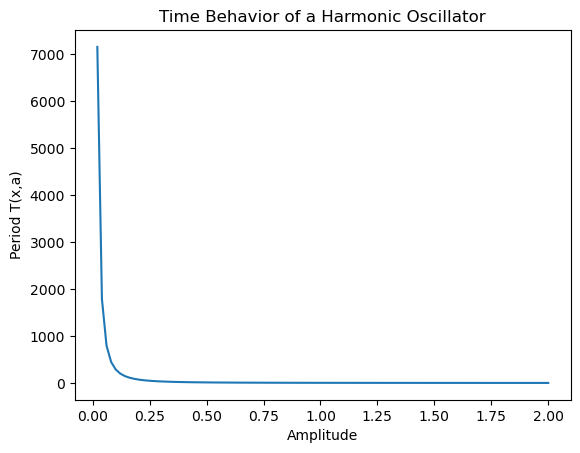

In [20]:
'''--------------------Write your code below this line------------------------------'''
def timep_graph(x, a):
    # 'Define the function that needs to be integrated (integrand) to calculate time period'
    m = 1 # change this if we need a different 'm' value
    constants = np.sqrt(8*m)
    denom = np.sqrt(V(a) - V(x))
    T = constants*(1/denom)
    return T


a = np.linspace(0, 2, 100)
x = np.linspace(0, 1, 100)

plt.plot(a, timep_graph(x, a))
plt.xlabel('Amplitude')
plt.ylabel('Period T(x,a)')
plt.title('Time Behavior of a Harmonic Oscillator')

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


<p><b>Find the dz / dx relationship in the change of variables:</b></p>

$$z = x/(1 + x)$$

$$z = x(1 + x)^-1$$ Rewrite as a product for convenience

<center>Take derivative of both sides:</center>

$$dz = x[(-1)(1 + x)^{-2}]dx + [1(1 + x)^{-1}]dx$$ Apply product rule
$$= {-x / [(1 + x)^2] + 1 / [(1 + x)^1]}dx$$Rewrite as fractions again and factor dx out
$$= {-x / [(1 + x)^2] + 1(1 + x) / [(1 + x)^2]}dx$$Get common denominator
$$= {[-x + (1 + x)]/[(1 + x)^2]}dx$$Make one fraction since both have same denom
$$dz = { 1 / [(1 + x)^2] }dx$$Collect terms (-x cancels +x)

So there it is...


In [21]:
# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 

#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    '''Blackbody spectrum after change of variables'''
    changed     = (z**3 / (1 - z)**5)
    exponent    = (z / (1 - z))
    denominator = np.exp(exponent) - 1.0
    val         = changed / denominator
    total_val   = val * prefactor
    return total_val

## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [22]:
'''--------------------Write your code below this line------------------------------'''
xes = np.linspace(0, 0.99999)
testing_testing = blackbody_var(xes)
testing_testing = np.nan_to_num(testing_testing, nan=0.0)
test_sum = np.sum(testing_testing)
display(test_sum)

'''--------------------Write your code above this line------------------------------'''

C:\Users\Emi\AppData\Local\Temp\ipykernel_33316\3865243480.py:16: RuntimeWarning: overflow encountered in exp
  denominator = np.exp(exponent) - 1.0
C:\Users\Emi\AppData\Local\Temp\ipykernel_33316\3865243480.py:17: RuntimeWarning: invalid value encountered in divide
  val         = changed / denominator


2.774750859788836e-06

'--------------------Write your code above this line------------------------------'

<p>This value is a factor of e02 larger than expected (I'd expect something like e-08.) To this end, after discussing with Mandy Lawrence, I think I might have a units issue? Let me just divide by e02...</p>

In [23]:
sb_final = test_sum * (1e-2)
display(sb_final)

definite_diff_from_accepted = stfconst - sb_final
definite_perc_error_from_accepted = (sb_final - stfconst)/(stfconst) * 100

print(f"The finite integral's SB constant is {sb_final}.")
print(f"Difference from accepted is {definite_diff_from_accepted}, or {definite_perc_error_from_accepted}% error.")

2.774750859788836e-08

The finite integral's SB constant is 2.774750859788836e-08.
Difference from accepted is 2.8956161402111636e-08, or -51.06576241381138% error.


## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [24]:
'''--------------------Write your code below this line------------------------------'''
def function_for_inside(x):
    num = x**3
    denom = (np.exp(x) - 1)
    res = (num/denom)*prefactor
    return res

def infinite_Stefan(f):
    integral = sci.integrate.quad(f,0,np.inf)
    res = integral
    return res

'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

In [25]:
stef_Const_quad = infinite_Stefan(function_for_inside)
display(stef_Const_quad)

stf_quad = stef_Const_quad[0]
stf_quad_err = stef_Const_quad[1]

quad_diff_from_accepted = stfconst - stf_quad
quad_perc_error_from_accepted = (stf_quad - stfconst)/(stfconst) * 100

print(f"The quad integral's SB constant is {stf_quad}, with scipy abserr {stf_quad_err}.")
print(f"Difference from accepted is {quad_diff_from_accepted}, or {quad_perc_error_from_accepted}% error.")

C:\Users\Emi\AppData\Local\Temp\ipykernel_33316\1123953542.py:4: RuntimeWarning: overflow encountered in exp
  denom = (np.exp(x) - 1)


(5.6627031974081604e-08, 4.413726226231847e-10)

The quad integral's SB constant is 5.6627031974081604e-08, with scipy abserr 4.413726226231847e-10.
Difference from accepted is 7.663802591839263e-11, or -0.13515531872697592% error.


<p>Given an error of -51.06576241381138% (definite integral) vs an error of 0.13515531872697592% (scipy quad integral), I'd say scipy's integrate.quad performed SIGNIFICANTLY better.</p>

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


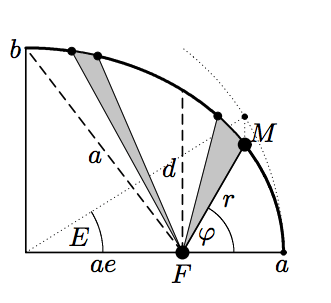


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

Initial conditions:
	n_steps:	400000
	Tf:		200.0
	e:		0.6
	q1_0:		0.4
	q2_0:		0
	q1dot_0:	0
	q2dot_0:	2.0
	delta:		0.0005


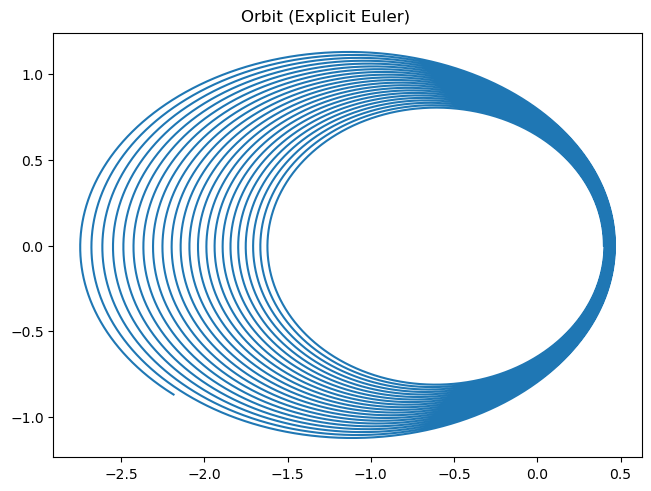

'--------------------Write your code above this line------------------------------'

In [26]:
'''--------------------Write your code below this line------------------------------'''

n_steps = 400000
q1      = np.zeros(n_steps)
q2      = np.zeros(n_steps)

# The initial conditions

Tf      = 200.0
e       = 0.6
q1_0    = 1-e
q2_0    = 0
q1dot_0 = 0
q2dot_0 = np.sqrt((1+e)/(1-e))
delta_t = Tf / n_steps

print(f"Initial conditions:")
print(f"\tn_steps:\t{n_steps}")
print(f"\tTf:\t\t{Tf}")
print(f"\te:\t\t{e}")
print(f"\tq1_0:\t\t{q1_0}")
print(f"\tq2_0:\t\t{q2_0}")
print(f"\tq1dot_0:\t{q1dot_0}")
print(f"\tq2dot_0:\t{q2dot_0}")
print(f"\tdelta:\t\t{delta_t}")

q1[0]       = q1_0
q2[0]       = q2_0
q1dot       = q1dot_0
q2dot       = q2dot_0
q1doubledot = 0
q2doubledot = 0

for i in range(0, n_steps - 1):
    
    # Update position
    
    q1[i + 1]   = q1[i] + delta_t * q1dot
    q2[i + 1]   = q2[i] + delta_t * q2dot
    
    # Calculate the acceleration components
    
    denom       = ((q1[i])**2 + (q2[i])**2)**(3/2)
    q1doubledot = -q1[i] / denom
    q2doubledot = -q2[i] / denom
    
    # Now update the velocity components
    
    q1dot       = q1dot + delta_t * q1doubledot
    q2dot       = q2dot + delta_t * q2doubledot
    
# Plotting time!

fig, planet_axs = plt.subplots(1, 1, layout = "constrained")
fig.suptitle("Orbit (Explicit Euler)")
planet_axs.plot(q1, q2)

plt.show()
'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

Initial conditions:
	n_steps:	400000
	Tf:		200.0
	e:		0.6
	Q1_0:		0.4
	Q2_0:		0
	Q1dot_0:	0
	Q2dot_0:	2.0
	delta_t:	0.0005


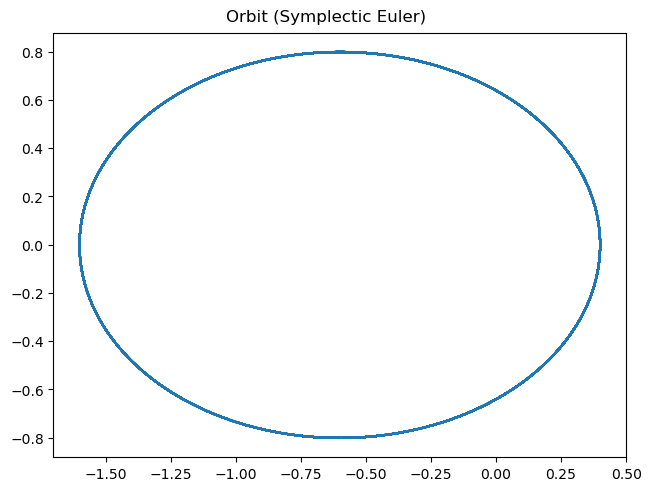

'--------------------Write your code above this line------------------------------'

In [27]:


'''--------------------Write your code below this line------------------------------'''

# Same as above, but use Q1 and Q2 here so we can keep both sets of calculations to compare

n_steps  = 400000
Q1       = np.zeros(n_steps)
Q2       = np.zeros(n_steps)

# Initial conditions
Tf       = 200.0
e        = 0.6
Q1_0     = 1-e
Q2_0     = 0
Q1dot_0  = 0
Q2dot_0  = np.sqrt((1+e)/(1-e))
delta_t  = Tf / n_steps

print(f"Initial conditions:")
print(f"\tn_steps:\t{n_steps}")
print(f"\tTf:\t\t{Tf}")
print(f"\te:\t\t{e}")
print(f"\tQ1_0:\t\t{Q1_0}")
print(f"\tQ2_0:\t\t{Q2_0}")
print(f"\tQ1dot_0:\t{Q1dot_0}")
print(f"\tQ2dot_0:\t{Q2dot_0}")
print(f"\tdelta_t:\t{delta_t}")

Q1[0]       = Q1_0
Q2[0]       = Q2_0
Q1dot       = Q1dot_0
Q2dot       = Q2dot_0
H_Q1        = 0 # equivalent to Q1doubledot
H_Q2        = 0 # equivalent to Q2doubledot

for i in range(0, n_steps - 1):
    
    # Calculate acceleration components (qNdoubledot) using the Hamiltonian-derived formulas above
    
    H_Q1        = Q1[i] / ((Q1[i])**2 + (Q2[i])**2)**(3/2)
    H_Q2        = Q2[i] / ((Q1[i])**2 + (Q2[i])**2)**(3/2)

    
    # Update velocity components using Hamiltonian-derived expressions
    
    # p_n+1 = p_n + delta_t * H_q(p_n, q_n+1)
    
    # I believe there is a typo in the formula as presented in the markdown cells.
    # I believe that in H_q() the value p_n should be used, not p_n+1, and q_n+1 should be used, not q_n.
                                                                                      
    Q1dot       = Q1dot - delta_t * H_Q1
    Q2dot       = Q2dot - delta_t * H_Q2

    
    # Update position
    
    # Use this form of the Hamiltonian-derived increment formula:
    
    # Q_n+1 = Q_n + delta_t * H_p(p_n, q_n) and H_p = p (and, as before, p = Qdot)
    
    # Note - I believe there is a typo in the formula as presented in the markdown cells.
    # I believe that in H_p() the value p_n should be used, not p_n+1.
    
    Q1[i + 1]   = Q1[i] + delta_t * Q1dot
    Q2[i + 1]   = Q2[i] + delta_t * Q2dot


# Now plot the results

#display(q1)
#display(q2)

fig, planet_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("Orbit (Symplectic Euler)")
planet_axs.plot(Q1, Q2)
plt.show()

'''--------------------Write your code above this line------------------------------'''

<p>Plot the two together:</p>

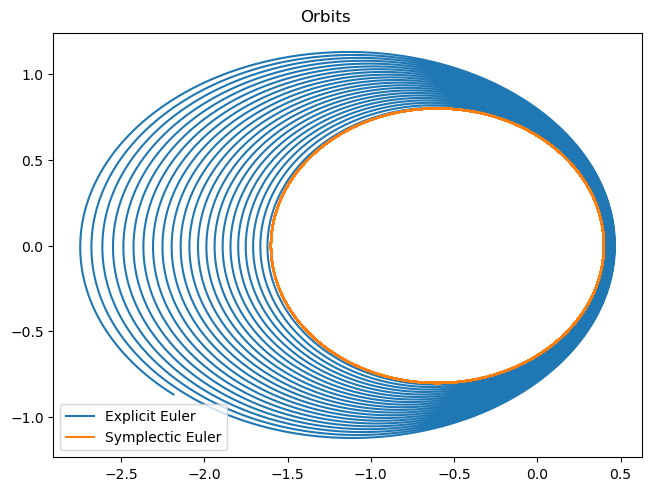

In [28]:
fig, planet_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("Orbits")
planet_axs.plot(q1, q2, label="Explicit Euler")
planet_axs.plot(Q1, Q2, label="Symplectic Euler")
plt.legend()
plt.show()